In [1]:
from tensorflow.keras.models import load_model

In [2]:
generator = load_model("./models/generator_020.h5")

In [3]:
from numpy.random import randn

In [4]:
def generate_latent_points(n, latent_dim=100):
    x_input = randn(latent_dim*n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

In [5]:
import matplotlib.pyplot as plt

In [135]:
def generate_plot(examples, rows, cols, fig_size=(10, 8)):
    plt.figure(figsize=fig_size)
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(examples[i, :, :])
    plt.show()

In [136]:
latent_points = generate_latent_points(25)

In [137]:
X = generator.predict(latent_points)

In [138]:
X = (X+1)/2

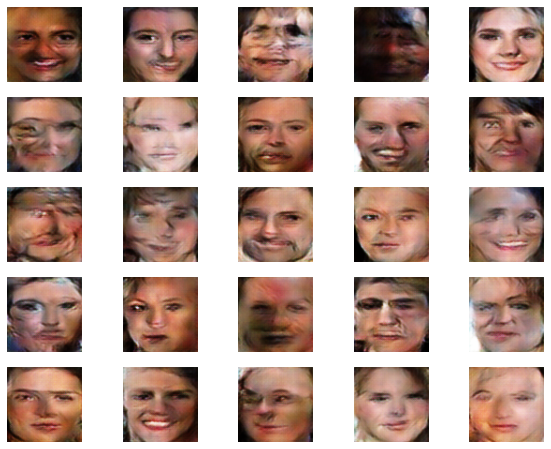

In [139]:
generate_plot(X, 5, 5)

In [141]:
from numpy import linspace, asarray

In [142]:
def interpolate_points(p1, p2, steps=10):
    ratios = linspace(0, 1, num=steps)
    vectors = []
    for ratio in ratios:
        v = (1-ratio)*p1 + ratio*p2
        vectors.append(v)
    return asarray(vectors)

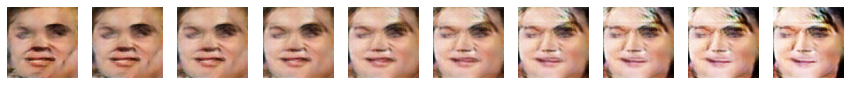

In [143]:
points = generate_latent_points(2)
interpolated = interpolate_points(points[0], points[1])
X = generator.predict(interpolated)
X = (X+1)/2
generate_plot(X, 1, len(interpolated), fig_size=(15,5))

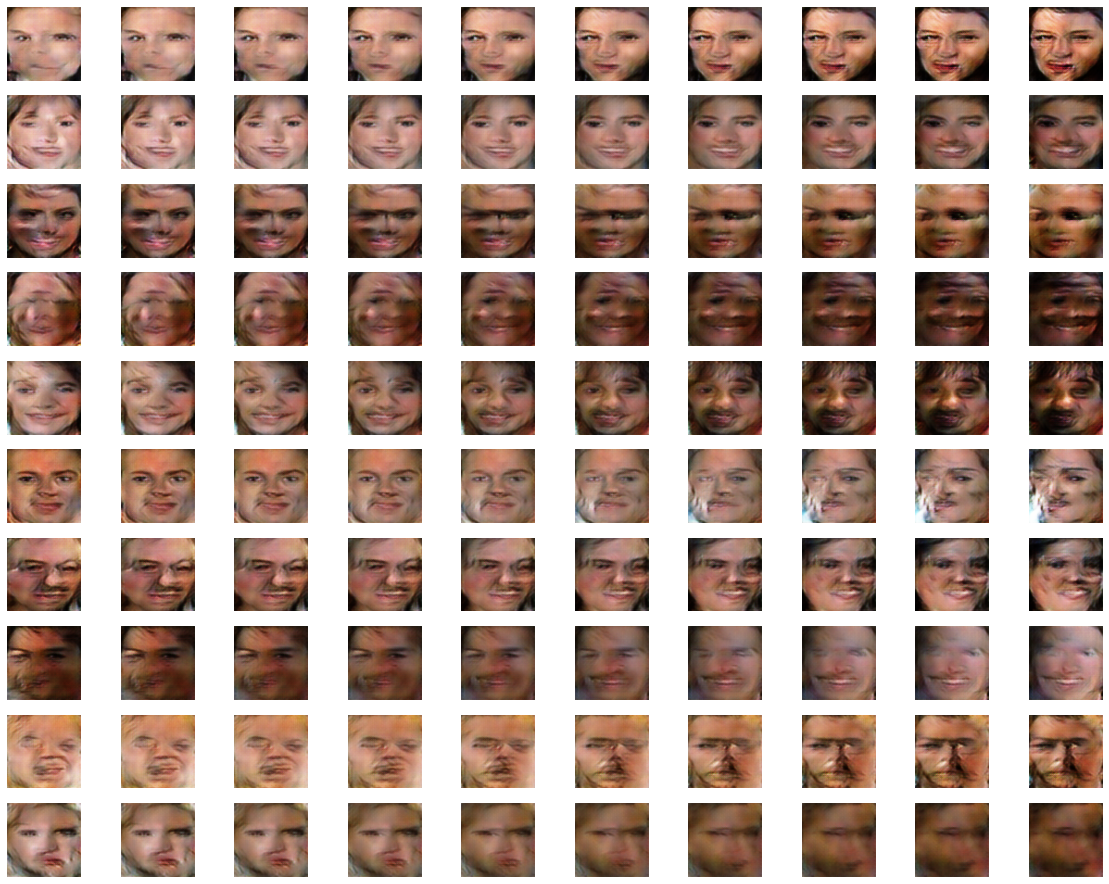

In [145]:
from numpy import vstack

n=20
points = generate_latent_points(20)
results = None
for i in range(0, n, 2):
    interpolated = interpolate_points(points[i], points[i+1])
    X = generator.predict(interpolated)
    X = (X+1)/2
    if results is None:
        results = X
    else:
        results = vstack((results, X))
generate_plot(results, 10, 10, fig_size=(20,16))

In [146]:
from numpy import arccos, clip, dot, sin
from numpy.linalg import norm

In [147]:
def slerp(val, low, high):
    omega = arccos(clip(dot(low/norm(low), high/norm(high)), -1, 1))
    so = sin(omega)
    if so == 0:
        return (1.0-val) * low + val * high
    return sin((1.0-val)*omega) / so * low + sin(val*omega) / so * high

In [148]:
def interpolate_points_slerp(p1, p2, steps=10):
    ratios = linspace(0, 1, num=steps)
    vectors = []
    for ratio in ratios:
        v = slerp(ratio, p1, p2)
        vectors.append(v)
    return asarray(vectors)

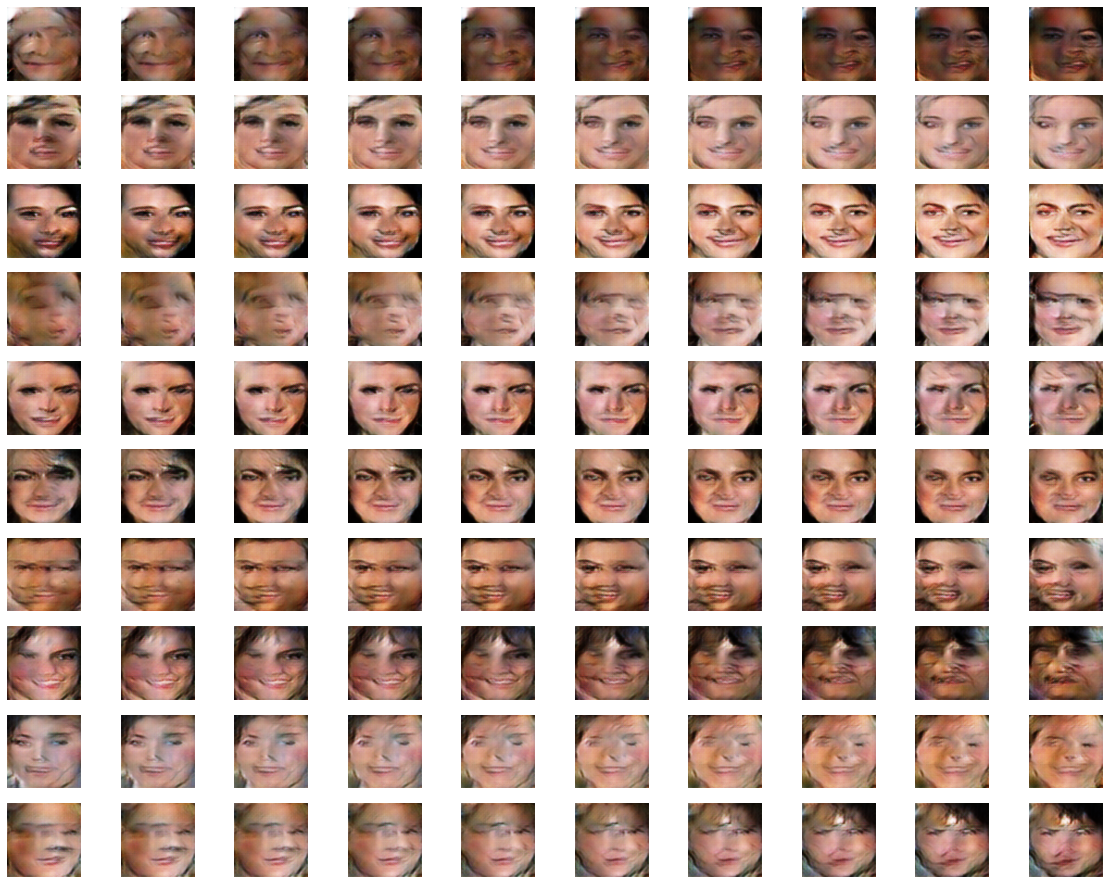

In [150]:
n=20
points = generate_latent_points(20)
results = None
for i in range(0, n, 2):
    interpolated = interpolate_points_slerp(points[i], points[i+1])
    X = generator.predict(interpolated)
    X = (X+1)/2
    if results is None:
        results = X
    else:
        results = vstack((results, X))
generate_plot(results, 10, 10, fig_size=(20,16))

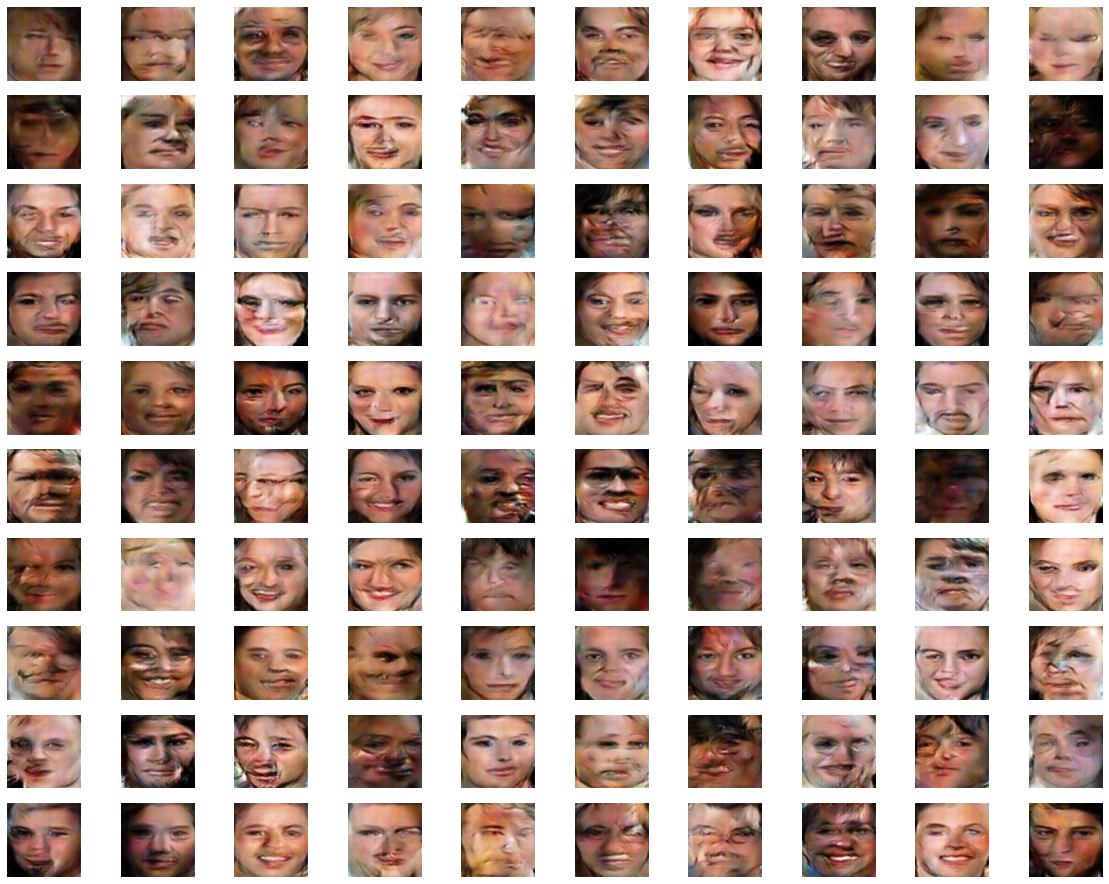

In [153]:
latent_points = generate_latent_points(100)
X = generator.predict(latent_points)
X = (X+1)/2
generate_plot(X, 10, 10, fig_size=(20,16))

In [213]:
smiling_woman_ix = [30, 99, 93]
neutral_woman_ix = [4, 19, 58]
neutral_man_ix = [34, 21, 76]

In [214]:
from numpy import mean
def average_points(ix):
    zero_ix = [i-1 for i in ix]
    vectors = latent_points[zero_ix]
    avg_vectors = mean(vectors, axis=0)
    all_vectors = vstack((vectors, avg_vectors))
    return all_vectors

In [215]:
smiling_woman = average_points(smiling_woman_ix)
neutral_woman = average_points(neutral_woman_ix)
neutral_man = average_points(neutral_man_ix)

In [216]:
all_vectors = vstack((smiling_woman, neutral_woman, neutral_man))

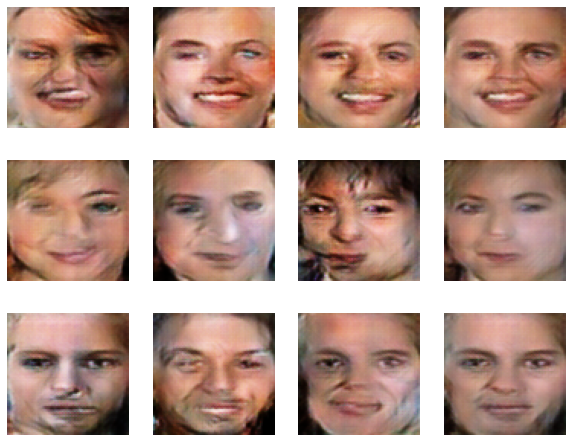

In [217]:
images = generator.predict(all_vectors)
images = (images+1)/2
generate_plot(images, 3, 4)

In [218]:
result_vector = smiling_woman[-1] - neutral_woman[-1] + neutral_man[-1]

In [219]:
from numpy import expand_dims
result_vector = expand_dims(result_vector, 0)
result_image = generator.predict(result_vector)
result_image = (result_image+1)/2

(-0.5, 79.5, 79.5, -0.5)

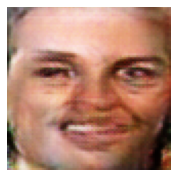

In [220]:
plt.figure(figsize=(3,3))
plt.imshow(result_image[0])
plt.axis('off')